<a href="https://colab.research.google.com/github/aeramireza/GenAI-chatbot/blob/main/EDA_Micro_Tesla_Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let's read in the file. It is a summary of some key financial features that I obtained from the 10-K forms of the last three fiscal years for Microsoft, Tesla and Apple, which are publicly shared on the SEC's EDGAR Database (https://www.sec.gov/search-filings). Keep in mind that all values in the CSV files are in millions of US dollars:


In [16]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/10-K report.csv')

In [17]:
# It is a small data set, so let's view it in full
df

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities
0,Microsoft,2020,143015.0,44281.0,NaN,NaN,60675
1,Microsoft,2021,168088.0,61271.0,333779.0,191791.0,76740
2,Microsoft,2022,198270.0,72738.0,364840.0,198298.0,89035
3,Microsoft,2023,211915.0,72361.0,411976.0,205753.0,87582
4,Microsoft,2024,245122.0,88136.0,512163.0,243686.0,118548
5,Tesla,2019,NaN,NaN,NaN,NaN,2405
6,Tesla,2020,31540.0,721.0,52148.0,28418.0,5943
7,Tesla,2021,53820.0,5519.0,62131.0,30548.0,11497
8,Tesla,2022,81460.0,12556.0,82338.0,36440.0,14724
9,Tesla,2023,96770.0,14997.0,106618.0,43009.0,13256


In [18]:
# Let's analize how the variables have changed year after year

df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue'].pct_change(fill_method=None) * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income'].pct_change(fill_method=None) * 100
df['Assets Growth (%)'] = df.groupby(['Company'])['Total Assets'].pct_change(fill_method=None) * 100
df['Liabilities Growth (%)'] = df.groupby(['Company'])['Total Liabilities'].pct_change(fill_method=None) * 100
df['Cash Flow Growth (%)'] = df.groupby(['Company'])['Cash Flow from Operating Activities'].pct_change(fill_method=None) * 100

In [19]:
df.columns

Index(['Company', 'Year', 'Total Revenue', 'Net Income', 'Total Assets',
       'Total Liabilities', 'Cash Flow from Operating Activities',
       'Revenue Growth (%)', 'Net Income Growth (%)', 'Assets Growth (%)',
       'Liabilities Growth (%)', 'Cash Flow Growth (%)'],
      dtype='object')

In [20]:
# Let's take a look at the percentage change
df.iloc[:,[0,1,7,8,9,10,11]].round(1)

,Company,Year,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
0,Microsoft,2020,NaN,NaN,NaN,NaN,NaN
1,Microsoft,2021,17.5,38.4,NaN,NaN,26.5
2,Microsoft,2022,18.0,18.7,9.3,3.4,16.0
3,Microsoft,2023,6.9,-0.5,12.9,3.8,-1.6
4,Microsoft,2024,15.7,21.8,24.3,18.4,35.4
5,Tesla,2019,NaN,NaN,NaN,NaN,NaN
6,Tesla,2020,NaN,NaN,NaN,NaN,147.1
7,Tesla,2021,70.6,665.5,19.1,7.5,93.5
8,Tesla,2022,51.4,127.5,32.5,19.3,28.1
9,Tesla,2023,18.8,19.4,29.5,18.0,-10.0


In [21]:
# Let's add a column for equity (in millions of dollars) by subtracting liabilities from assets. This will help assess the financial health of the companies:
df['Equity'] = df['Total Assets'] - df['Total Liabilities']

# And let's also look at the percentage change of equity:
df['Equity Growth (%)'] = df.groupby(['Company'])['Equity'].pct_change(fill_method=None) * 100
df.loc[:,['Year','Company','Equity','Equity Growth (%)']].round(1)

,Year,Company,Equity,Equity Growth (%)
0,2020,Microsoft,NaN,NaN
1,2021,Microsoft,141988.0,NaN
2,2022,Microsoft,166542.0,17.3
3,2023,Microsoft,206223.0,23.8
4,2024,Microsoft,268477.0,30.2
5,2019,Tesla,NaN,NaN
6,2020,Tesla,23730.0,NaN
7,2021,Tesla,31583.0,33.1
8,2022,Tesla,45898.0,45.3
9,2023,Tesla,63609.0,38.6


In [22]:
# Let's make some plots! It will be useful to pivot the dataframe first in order to be able to plot more than one variable at a time

df1 = pd.melt(df, ['Year', 'Company'], ['Total Revenue', 'Net Income'])
df2 = pd.melt(df, ['Year', 'Company'], ['Revenue Growth (%)', 'Net Income Growth (%)'])
df3 = pd.melt(df, ['Year', 'Company'], ['Total Assets', 'Total Liabilities', 'Cash Flow from Operating Activities', 'Equity'])
df4 = pd.melt(df, ['Year', 'Company'], ['Assets Growth (%)', 'Liabilities Growth (%)', 'Cash Flow Growth (%)', 'Equity Growth (%)'])
df2.head()

,Year,Company,variable,value
0,2020,Microsoft,Revenue Growth (%),NaN
1,2021,Microsoft,Revenue Growth (%),17.531727
2,2022,Microsoft,Revenue Growth (%),17.956071
3,2023,Microsoft,Revenue Growth (%),6.882030
4,2024,Microsoft,Revenue Growth (%),15.669962


**Microsoft**

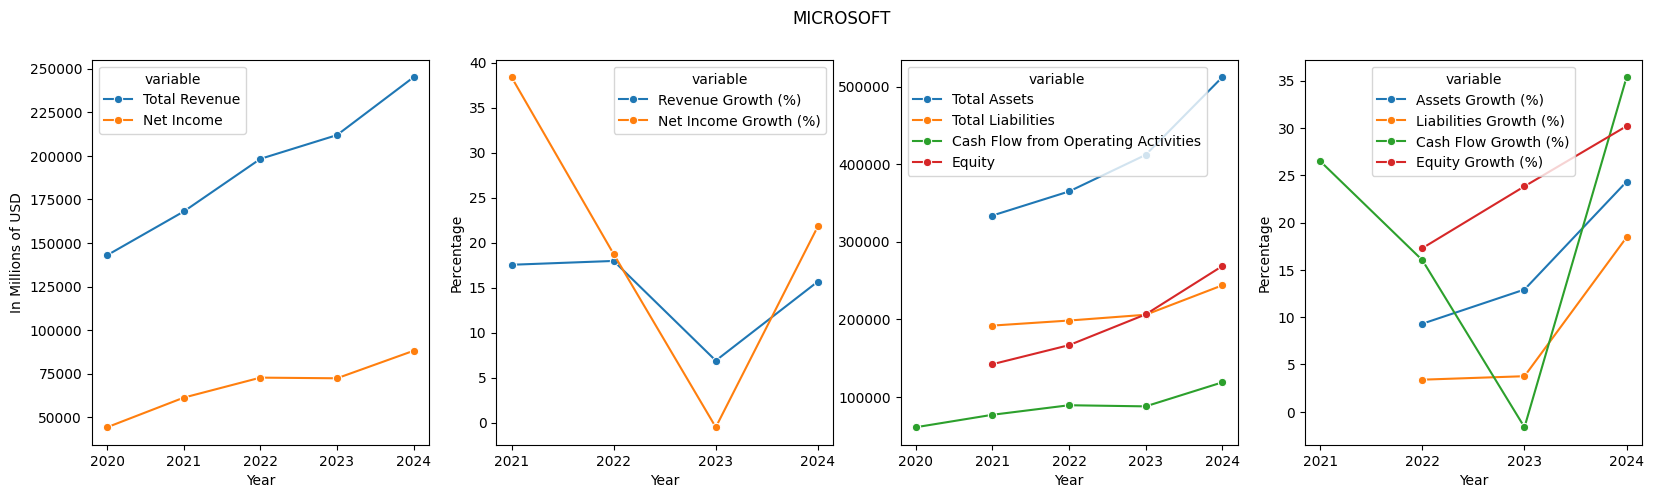

In [23]:
# Let's make some comparisons between variables for Microsoft

fig, axs = plt.subplots(1, 4, figsize=(20,5))
fig.suptitle('MICROSOFT')
axs[0] = sns.lineplot(data=df1[df1['Company']=='Microsoft'], x='Year', y='value', hue='variable', marker='o', ax=axs[0])
axs[1] = sns.lineplot(data=df2[df2['Company']=='Microsoft'], x='Year', y='value', hue='variable', marker='o', ax=axs[1])
axs[2] = sns.lineplot(data=df3[df3['Company']=='Microsoft'], x='Year', y='value', hue='variable', marker='o', ax=axs[2])
axs[3] = sns.lineplot(data=df4[df4['Company']=='Microsoft'], x='Year', y='value', hue='variable', marker='o', ax=axs[3])
axs[0].set_ylabel('In Millions of USD')
axs[1].set_ylabel('Percentage')
axs[3].set_ylabel('Percentage')
axs[2].set_ylabel('')
axs[1].set_xticks([2021, 2022, 2023, 2024], ['2021', '2022', '2023', '2024'])
axs[3].set_xticks([2021, 2022, 2023, 2024], ['2021', '2022', '2023', '2024'])
plt.show()

We can see from the plots that Revenue and Income have grown steadily in about the same manner with a minimum growth in year 2023. Total assets and total liabilities also have a similar behaviour, which is a good sign since the company relies on more debt as the increase in assets allows. We can also see that the cash flow growth has a similar behaviour to the net income growth, with a big dip in year 2023. For this, I will explore later a ratio between the two variables and how they are related.

**Tesla**

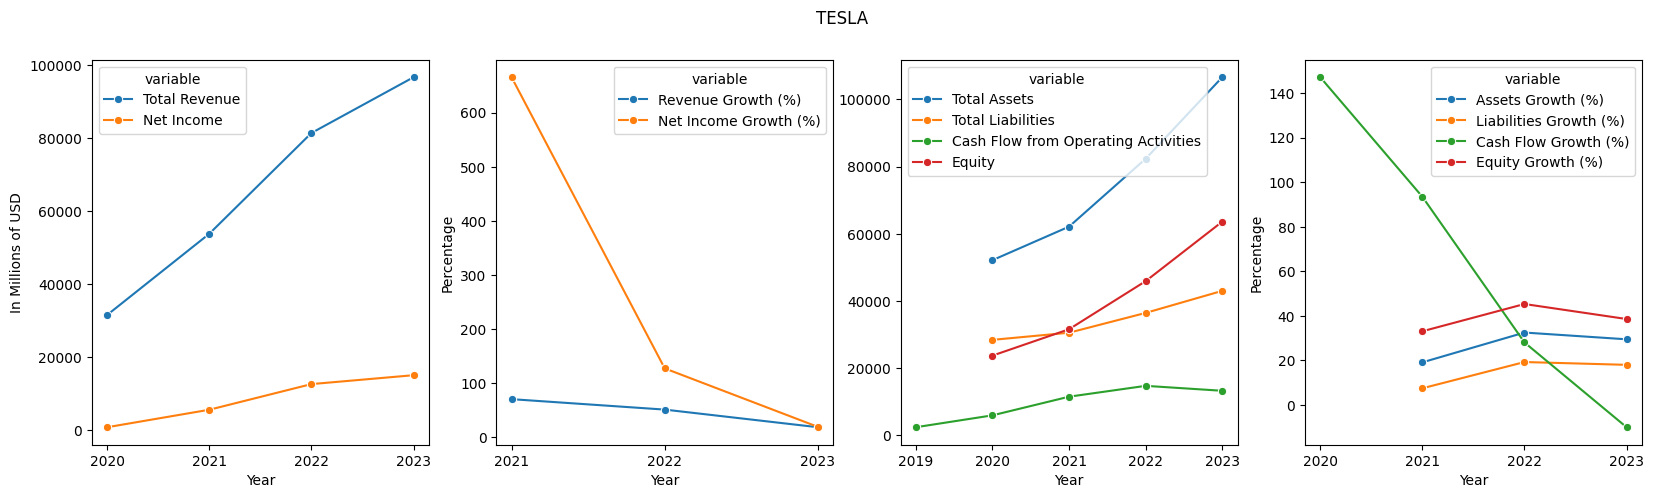

In [24]:
# Let's make some comparisons between variables for Tesla

fig, axs = plt.subplots(1, 4, figsize=(20,5))
fig.suptitle('TESLA')
axs[0] = sns.lineplot(data=df1[df1['Company']=='Tesla'], x='Year', y='value', hue='variable', marker='o', ax=axs[0])
axs[1] = sns.lineplot(data=df2[df2['Company']=='Tesla'], x='Year', y='value', hue='variable', marker='o', ax=axs[1])
axs[2] = sns.lineplot(data=df3[df3['Company']=='Tesla'], x='Year', y='value', hue='variable', marker='o', ax=axs[2])
axs[3] = sns.lineplot(data=df4[df4['Company']=='Tesla'], x='Year', y='value', hue='variable', marker='o', ax=axs[3])
axs[0].set_ylabel('In Millions of USD')
axs[1].set_ylabel('Percentage')
axs[2].set_ylabel('')
axs[3].set_ylabel('Percentage')
axs[0].set_xticks([2020, 2021, 2022, 2023], ['2020', '2021', '2022', '2023'])
axs[1].set_xticks([2021, 2022, 2023], ['2021', '2022', '2023'])
axs[3].set_xticks([2020, 2021, 2022, 2023], ['2020', '2021', '2022', '2023'])
plt.show()

For Tesla, we see that the net income has not increased as much as the total revenue during the last four fiscal years. Growth for total assets and liabilities has been similar. We also see that the net income has significantly decrease in the last three years as well as the cash flow from operating activities. As well as for Microsoft, these two variables behave in the same way, showing that the cash is flowing acording to how much income the company is having.

**Apple**

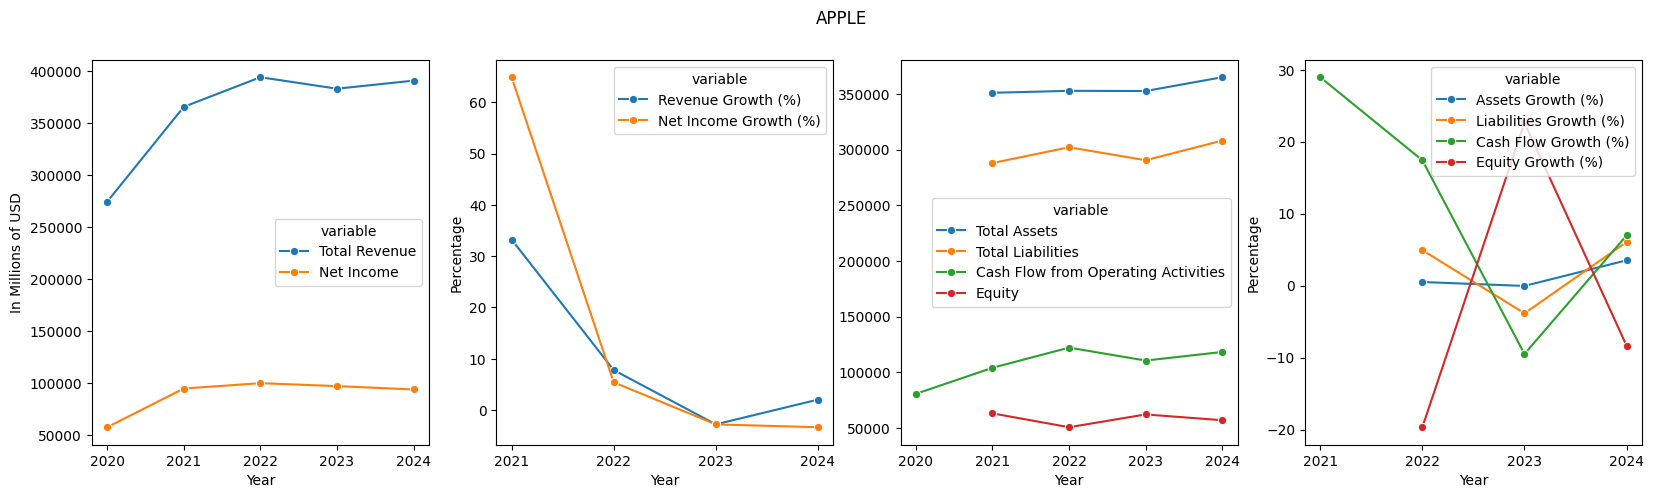

In [25]:
# Let's make some comparisons between variables for Apple

fig, axs = plt.subplots(1, 4, figsize=(20,5))
fig.suptitle('APPLE')
axs[0] = sns.lineplot(data=df1[df1['Company']=='Apple'], x='Year', y='value', hue='variable', marker='o', ax=axs[0])
axs[1] = sns.lineplot(data=df2[df2['Company']=='Apple'], x='Year', y='value', hue='variable', marker='o', ax=axs[1])
axs[2] = sns.lineplot(data=df3[df3['Company']=='Apple'], x='Year', y='value', hue='variable', marker='o', ax=axs[2])
axs[3] = sns.lineplot(data=df4[df4['Company']=='Apple'], x='Year', y='value', hue='variable', marker='o', ax=axs[3])
axs[0].set_ylabel('In Millions of USD')
axs[1].set_ylabel('Percentage')
axs[2].set_ylabel('')
axs[3].set_ylabel('Percentage')
axs[1].set_xticks([2021, 2022, 2023, 2024], ['2021', '2022', '2023', '2024'])
axs[3].set_xticks([2021, 2022, 2023, 2024], ['2021', '2022', '2023', '2024'])
plt.show()

For Apple, total revenue and net income have similar trends. Also, total assets and liabilities do. However, unlike the other two companies, Apple presents a very high and sustained level of debt (total liabilities are very close to total assets), and therefore, a small level of equity throughout the years. In fact, it is the only company whose cash flow from operating activities is greater than the equity.

**Equity-to-Asset Ratio and Cash Flow from Operating Activities (CFO) to Net Income Ratio**

These ratios will give us a clearer outlook at the financial robustness of the companies.

In [26]:
# Let's calculate the equity to asset ratio
df['Equity to Asset Ratio'] = df['Equity'] / df['Total Assets']

# Let's calculate the cash flow to net income ratio
df['CFO to Net Income ratio'] = df['Cash Flow from Operating Activities'] / df['Net Income']
df_new = df[['Year', 'Company', 'Equity to Asset Ratio', 'CFO to Net Income ratio']]
df_new

,Year,Company,Equity to Asset Ratio,CFO to Net Income ratio
0,2020,Microsoft,NaN,1.370227
1,2021,Microsoft,0.425395,1.252469
2,2022,Microsoft,0.456480,1.224051
3,2023,Microsoft,0.500570,1.210348
4,2024,Microsoft,0.524202,1.345058
5,2019,Tesla,NaN,NaN
6,2020,Tesla,0.455051,8.242718
7,2021,Tesla,0.508329,2.083167
8,2022,Tesla,0.557434,1.172666
9,2023,Tesla,0.596607,0.883910


In [27]:
# Let's calculate the average equity to asset ratio, and the average cash flow to income ratio for the last four fiscal years reported by each company:

df_new.groupby(['Company'])[['Equity to Asset Ratio', 'CFO to Net Income ratio']].mean()

,Equity to Asset Ratio,CFO to Net Income ratio
Company,,
Apple,0.163921,1.225840
Microsoft,0.476662,1.280430
Tesla,0.529355,3.095616


As we can see Microsoft and Tesla have had consistent equity to asset ratios (around 0.5). This means that for the last four years, these companies have been primarily financed by their own equity rather than debt. This could be seen as a sign of stability and financial strength. Unlike Apple, which with an average of 0.16 for this ratio, relies heavily on debt to finance its operations, which could be considered risky.

About the CFO (Cash Flow from Operations) to net income ratio, we see that Microsoft has had a steady ratio of about 1.23, which is a good indicator of financial health in terms of liquidity and stability. On the other hand, Tesla has a very fluctuating CFO to net income ratio, which might rise concerns about cash flow issues. Apple, just like Microsoft, also presents a steady CFO to net income ratio of a little above 1, which means that the company has good cash generation and enough liquidity inspite of being highly dependent on debt.

**Conclusions**

1. Microsoft has a pretty robust and stable financial health, since it is not overly reliant on debt for its operations and has good liquidity. Also, it keeps increasing revenue, income and equity over the years.

2. Tesla seems to also have good financial health, but some of its indicators are more volatile.

3. Apple relies too much on debt and presents a negative growth in its net income for the last couple of years, but manages to keep its finances afloat with a good level of liquidity.